# 2주차 실습과제
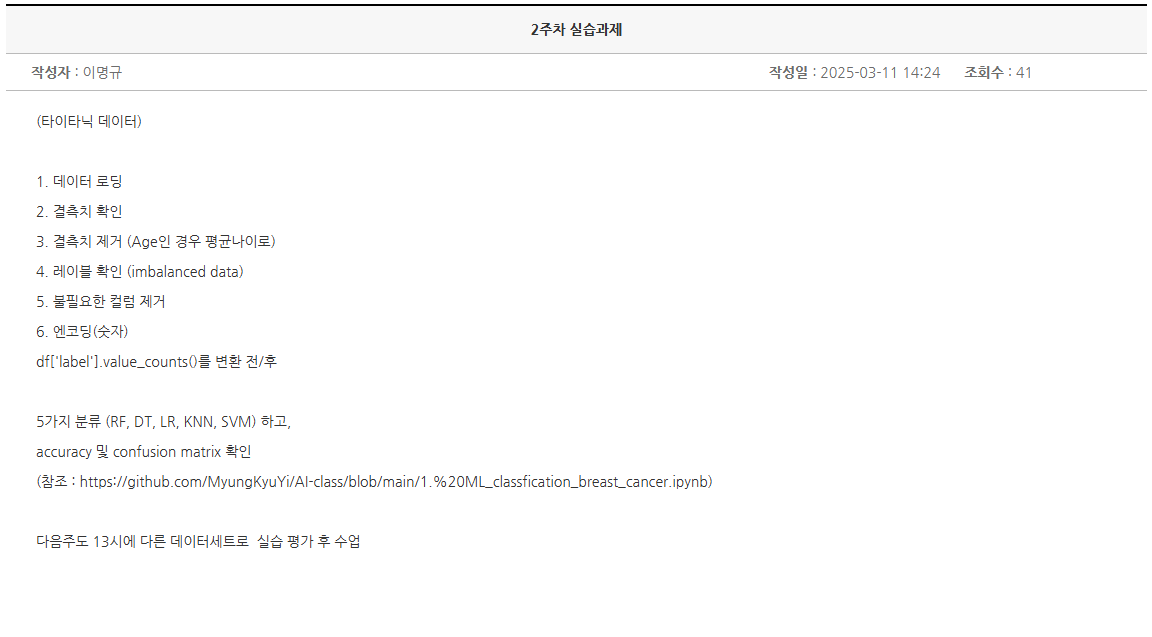

# 1. 데이터 로딩

In [1]:
import pandas as pd

# 1️⃣ 타이타닉 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv"
df = pd.read_csv(url)

# 2️⃣ 데이터 확인
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. 결측치 확인

In [2]:
# 1️⃣ 컬럼별 결측치 개수 확인
print(df.isnull().sum())

# 2️⃣ 전체 결측치 개수 출력
print("\n총 결측치 개수:", df.isnull().sum().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

총 결측치 개수: 866


# 3. 결측치 처리 (Age 평균값으로 대체)

In [3]:
# 1️⃣ 'Age' 컬럼 결측치를 평균값으로 채우기
df['Age'] = df['Age'].fillna(df['Age'].mean())

# 2️⃣ 결측치 여부 다시 확인
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# 4. 레이블 확인 (Imbalanced Data 여부)

In [4]:
# `Survived` 컬럼의 클래스 분포 확인
print(df['Survived'].value_counts(normalize=True))  # 비율 확인


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


# 5. 불필요한 컬럼 제거

---

## 타이타닉 생존자 예측을 위한 변수 설명
모델링에 필요한 컬럼과 불필요한 컬럼을 구분하여 정리

### 생존 여부 예측에 필요한 컬럼
- **Survived** : 생존 여부 (종속 변수)
- **Pclass** : 티켓의 승선권 클래스  
  승객의 사회적, 경제적 지위를 나타냄. 높은 계층일수록 생존 확률이 높을 가능성이 있음.  
  - 1st = Upper (상류층)  
  - 2nd = Middle (중산층)  
  - 3rd = Lower (하류층)  
- **Sex** : 성별  
  성별에 따라 먼저 구조될 가능성이 다름. 여성과 아이들이 우선 구조되었을 가능성이 있음.  
- **Age** : 나이  
  각 연령대(어린이, 청소년, 성인)에 따라 생존율이 다를 수 있음.  
- **SibSp** : 형제자매(Sibling) + 배우자(Spouse) 수  
  동반 가족 수에 따라 생존 확률이 달라질 수 있음.  
- **Parch** : 부모(Parent) + 자식(Child) 수  
  가족 단위로 구조될 가능성이 있음.  
- **Fare** : 티켓 요금  
  요금이 비싼 티켓을 구매한 승객일수록 생존 가능성이 높을 수도 있음. (고급 선실 이용)  

---

### 불필요한 컬럼 (제거 대상)
분석에 큰 영향을 주지 않거나 중복되는 정보
- ~~`PassengerId`~~ : 각 승객의 고유 번호 → **모델링에 의미 없음 (제거)**
- ~~`Name`~~ : 이름 → **이름이 생존 여부에 직접적인 영향을 미치지 않음 (제거)**
- ~~`Ticket`~~ : 티켓 고유번호 → **고유 값으로 생존 여부 예측에 불필요 (제거)**
- ~~`Cabin`~~ : 객실 번호 → **객실 위치가 생존에 영향을 줄 수도 있지만, 결측치가 많아 제거 (제거)**
- ~~`Embarked`~~ : 승선 항구 → **탑승한 항구가 생존과 큰 상관이 없을 가능성이 높음 (제거)**  
  - C = Cherbourg  
  - Q = Queenstown  
  - S = Southampton  

---

In [5]:
# 불필요한 컬럼 제거 (PassengerId, Name, Ticket, Cabin)
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], inplace=True, errors='ignore')

# 삭제된 데이터프레임 확인
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.000000,1,0,7.2500
1,1,1,female,38.000000,1,0,71.2833
2,1,3,female,26.000000,0,0,7.9250
3,1,1,female,35.000000,1,0,53.1000
4,0,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000
887,1,1,female,19.000000,0,0,30.0000
888,0,3,female,29.699118,1,2,23.4500
889,1,1,male,26.000000,0,0,30.0000


# 6. 숫자형 데이터로 변환 (Encoding)

In [6]:
from sklearn.preprocessing import LabelEncoder

# 1️⃣ 변환 전 `Sex` 컬럼 확인
print("변환 전 데이터:")
print(df['Sex'].value_counts())

# 2️⃣ `Sex` 컬럼을 숫자로 변환 (Male=0, Female=1)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# 3️⃣ 변환 후 `Sex` 컬럼 확인
print("\n변환 후 데이터:")
print(df['Sex'].value_counts())


변환 전 데이터:
Sex
male      577
female    314
Name: count, dtype: int64

변환 후 데이터:
Sex
1    577
0    314
Name: count, dtype: int64


# 7. 학습 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split

# 1️⃣ 특성(X)과 타겟(y) 설정
X = df.drop(columns=['Survived'])  # `Survived`는 정답(레이블)이므로 제외
y = df['Survived']

# 2️⃣ 학습용 80%, 테스트용 20% 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ 데이터 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(712, 6) (179, 6) (712,) (179,)


# 8. 머신러닝 모델 적용 (RF, DT, LR, KNN, SVM)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 1️⃣ 모델 정의
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC()
}

# 2️⃣ 모델 학습 및 평가
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # 모델 학습
    y_pred = model.predict(X_test)  # 예측
    acc = accuracy_score(y_test, y_pred)  # 정확도 계산
    results[name] = acc
    
    # 혼동 행렬 출력
    print(f"\n{name} - 정확도: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))  # Confusion Matrix 출력

# 3️⃣ 최종 결과 정리
print("\n---<모델별 정확도 비교>---")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")



Random Forest - 정확도: 0.8156
[[91 14]
 [19 55]]

Decision Tree - 정확도: 0.7654
[[86 19]
 [23 51]]

Logistic Regression - 정확도: 0.8101
[[92 13]
 [21 53]]

K-Nearest Neighbors - 정확도: 0.6983
[[85 20]
 [34 40]]

SVM - 정확도: 0.6536
[[99  6]
 [56 18]]

---<모델별 정확도 비교>---
Random Forest: 0.8156
Decision Tree: 0.7654
Logistic Regression: 0.8101
K-Nearest Neighbors: 0.6983
SVM: 0.6536
